In [70]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [71]:
# 1. Preparando os Dados (Já está pronto)

"""setando seed"""
torch.manual_seed(42)

digits = load_digits()
X = digits.data  # Matriz (1797, 64)
y = digits.target # Vetor (1797,)

# Normalizando e convertendo para PyTorch
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_tensor = torch.FloatTensor(X)
y_tensor = torch.LongTensor(y)

# Divisão Treino/Teste
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


In [72]:
# Exemplo caso queiram explorar os dados:
len(digits.target_names) # Isso vai dar 10
# ou
len(set(digits.target))  # Isso conta os valores únicos (0 a 9), dando 10

# # Em digits temos:

# 1.  'data' (os dados X)
# 2.  'target' (os labels y)
# 3.  'frame'
# 4.  'feature_names'
# 5.  'target_names'
# 6.  'images'
# 7.  'DESCR' (descrição do dataset)

10

Iniciando treinamento...


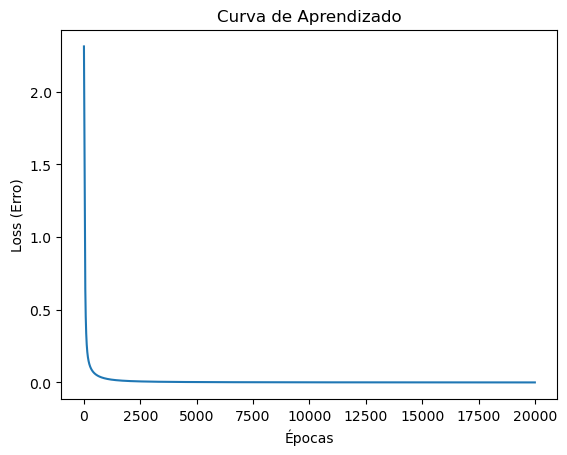

Acurácia no Teste: 97.22%


In [73]:
# SEU TRABALHO COMEÇA AQUI!!!

# Complete a arquitetura. Dica: A entrada tem tamanho 64. A saída deve ter tamanho 10 (representando os 10 possíveis números).
modelo = nn.Sequential(
    nn.Linear(64, 32), # Exemplo de primeira camada
    nn.ReLU(),

    # Adicione mais camadas aqui, se quiser (p.s: teste assim antes)

    # !! ajustar a próxima linha antes de rodar !!
    nn.Linear(32,10)    # Exercício 1-A -> Defina a camada de saída correta. Lembrem-se da análogia do sanduíche, a saída no caso era 1 (sanduíche, nesse caso são 10 possíveis números).
)

# Função de Loss (aqui que o cálculo entre o output real e o esperado acontece).
criterion = nn.CrossEntropyLoss() # Correto para classificação. No exemplo da prática 1, utilizamos o MSE (erro médio quadrático)
# Otimizador
optimizer = torch.optim.SGD(modelo.parameters(), lr=0.1)

# Loop de Treino
num_epochs = 20000
loss_history = []

print("Iniciando treinamento...")

for epoch in range(num_epochs):
    # Forward prop
    outputs = modelo(X_train)
    loss = criterion(outputs, y_train)

    # Backward prop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

# Plotagem
plt.plot(loss_history)
plt.title("Curva de Aprendizado")
plt.xlabel("Épocas")
plt.ylabel("Loss (Erro)")
plt.show()

# Teste Final (Cálculo de Acurácia)
with torch.no_grad():
    outputs = modelo(X_test)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    print(f'Acurácia no Teste: {accuracy*100:.2f}%')

# Exercício 1-B -> Olhando para o gráfico, o modelo precisava de todas as 1000 épocas ou ele aprendeu tudo o que podia antes? Em qual época (aproximadamente) ele estabilizou?
# Na resposta, anexe a imagem da curva de treinamento.


Acurácia Final no Teste: 97.22%


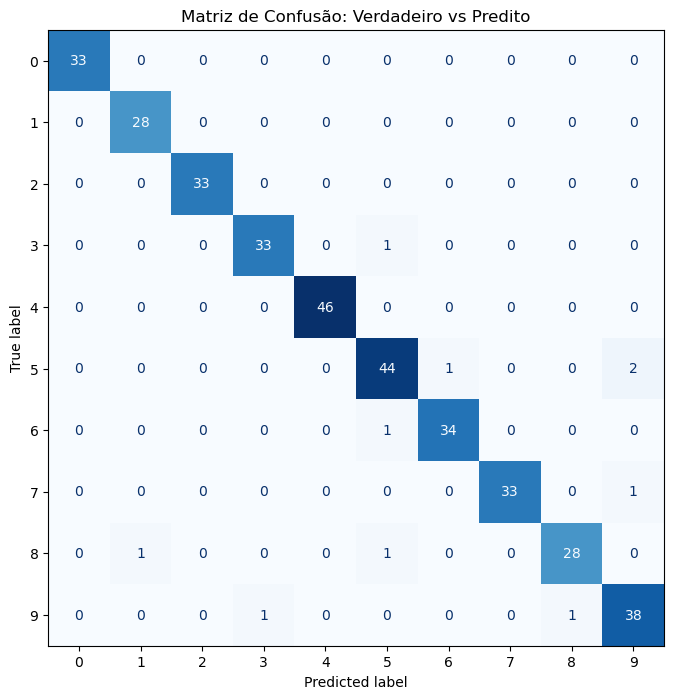

In [74]:
modelo.eval() # Colocando o modelo em modo de teste

with torch.no_grad():
    outputs = modelo(X_test)
    # Pega o índice do maior valor (a classe predita)
    _, predicted = torch.max(outputs, 1)

    # Cálculo da Acurácia
    total = y_test.size(0)
    correct = (predicted == y_test).sum().item()
    acc = correct / total
    print(f"\nAcurácia Final no Teste: {acc*100:.2f}%")

    # Matriz de Confusão (como mostrado nos exemplos de projetos utilizando os dados de EEG)
    cm = confusion_matrix(y_test, predicted)

    fig, ax = plt.subplots(figsize=(8, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    plt.title("Matriz de Confusão: Verdadeiro vs Predito")
    plt.show()

# Exercício 2 -> O modelo obteve uma acurácia alta. Olhe para a Matriz de Confusão abaixo e localize os números fora da diagonal principal (os erros).

# a. Cite um exemplo de erro que aconteceu (Ex: Era o número X, mas o modelo previu Y).

# b. Na sua opinião, visualmente (pensando em pixels borrados 8x8), essa confusão faz sentido? (Ex: 3 e 8 se parecem? 1 e 7 se parecem?).

# c. Reiniciem o código (colab), mudem a variável num_epochs para um valor bem menor (por exemplo, 10, ou 20). Como ficou a nova matriz de confusão? Faz sentido um modelo menos treinado errar mais?
# anexe a imagem da sua matriz de confusão junto do item c.